In [5]:
import numpy as np
import matplotlib.pyplot as plt

### Carga el Titanic dataset y separa los datos de entramiento 80% y prueba 20%

- Transforma todos los datos a números, e.g True or False to 0 and 1
- Separa X (features) y Y (labels) del dataset
- Reshape Y para que sean matrices. e.g (891,) a (891,1)
- Separa los datos(entramiento 80% y prueba 20%). Utiliza un random_state=0 para la separación del dataset.

In [101]:
import pandas as pd

df = pd.read_csv('Titanic-Dataset-Preprocesado.csv')

df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,-0.565736,1,0,-0.502445,0,1
1,1,1,0,0.663861,1,0,0.786845,0,0
2,1,3,0,-0.258337,0,0,-0.488854,0,1
3,1,1,0,0.433312,1,0,0.420730,0,1
4,0,3,1,0.433312,0,0,-0.486337,0,1


In [102]:
X = np.array(df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']])
y = np.array(df['Survived'])

y = y.reshape(-1, 1)

print('X shape:', X.shape)
print('Y shape:', y.shape)

X shape: (891, 8)
Y shape: (891, 1)


In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Recapitulación regresión logística:

#### Ecuaciones :

$ W = \begin{bmatrix}w_1 \\ w_2 \\ . \\ . \\ w_n \end{bmatrix}_{ (n,1)}$  ......... La inicializamos con zeros (0s)

$ B = $ parametro simple (solo un valor, no una matriz)

$ X = \begin{bmatrix}. & . & .  \\ .  & . & .  \\ . & . & .  \\ . & . & .  \\ \end{bmatrix}_{(m,n)}$

$ Y = \begin{bmatrix}. \\ . \\ . \\  . \\ \end{bmatrix}_{(m,1)}$


$\sigma = \frac{1}{(1 + e^{-x})}  $   ......... (sigmoid function)


A = $\sigma ( XW + b ) $    ........ probabilidades con shape (m,1) 


#### Cost function :

$ cost = - \frac{1}{m} \sum_{i=1}^m [ y*log(a) + (1 - y)*log(1 - a) ] $

#### Gradient Descent 

- Inicializar $W$ y $B$ a 0
- Repetir durante $i$ iteracciones:

    - $Z = XW + B$
    - $A = \sigma (Z)$ 

    - $dW = \frac{\partial COST }{\partial W} = X.T( A - Y ) $ ...... shape (n,1) 

    - $dB = \frac{\partial COST }{\partial B} = ( A - Y ) $

    - $W = W - \alpha * dW $ ......shape(n,1)

    - $B = B - \alpha * dB $


### Implementa la función sigmoide.

- Puedes utilizar np.exp https://numpy.org/doc/2.0/reference/generated/numpy.exp.html
- Comprueba que tu función es correcta. Utiliza un array de 0s. El resultado debe ser 0.5.

In [65]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [66]:
sigmoid(np.zeros((10, 1)))

array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5]])

### Visualiza la función sigmoide para valores de z entre -100 y 100

- Puedes utilizar la función np.arange para crear los valores (https://numpy.org/doc/stable/reference/generated/numpy.arange.html)

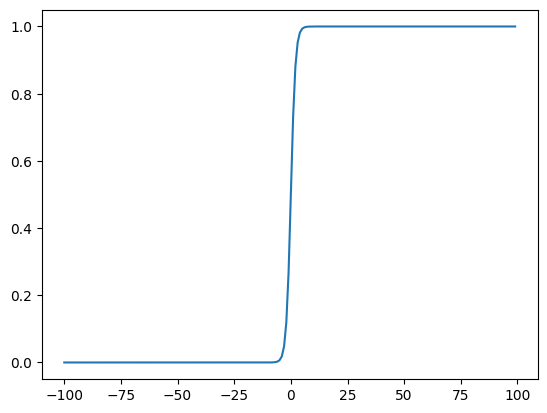

In [43]:
values = np.arange(-100, 100)

plt.plot(values, sigmoid(values))

#### Implementa el algoritmo de Regresión lineal.

In [46]:
X_train.shape

(712, 8)

In [89]:
class MyLogisticRegression:

    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, Y):
    
        m = X.shape[0] # Number of samples
        n = X.shape[1] # Number of features
        
        self.W = np.zeros((n,1))
        self.B = 0
        
        self.cost_list = []
        
        for i in range(self.iterations):
            
            Z = np.dot(X, self.W) + self.B

            A = sigmoid(Z)
            
            # cost function
            cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
            
            # Gradient Descent
            dW = (1/m)*np.dot(X.T, A-Y)
            dB = (1/m)*np.sum(A - Y)
            
            self.W = self.W - self.learning_rate * dW
            self.B = self.B - self.learning_rate * dB
            
            # Keeping track of our cost function value
            self.cost_list.append(cost)
            
            if(i%(self.iterations/10) == 0):
                print("cost after ", i, "iteration is : ", cost)
        
    def predict(self, X):

        Z = np.dot(X, self.W) + self.B
        A = sigmoid(Z) 
        A = A > 0.5
        A = np.array(A, dtype = 'int64')
        return A

## Entrena tu algoritmo y visualiza el costo

- Utiliza el dataset de entrenamiento
- Utiliza un learning rate = 0.0015
- Utiliza 100000 iteraciones.
- Intenta con un número diferente de iteraciones. Cuándo converge el algoritmo?
- Haz un plot del costo en comparación al número de iteraciones (cost en el eje Y e iteraciones en el eje X). Para esto puedes utilizar la propiedad cost_list de tu algoritmo

In [97]:
iterations = 120000
learning_rate = 0.0015

my_logistic_regression = MyLogisticRegression(learning_rate=0.0015, iterations=iterations)

my_logistic_regression.fit(X_train, y_train)

cost after  0 iteration is :  0.6931471805599453
cost after  12000 iteration is :  0.5162712237028106
cost after  24000 iteration is :  0.4885342323224458
cost after  36000 iteration is :  0.4758105696843368
cost after  48000 iteration is :  0.4682284108226657
cost after  60000 iteration is :  0.4630502870467504
cost after  72000 iteration is :  0.4592787402709222
cost after  84000 iteration is :  0.4564465348995151
cost after  96000 iteration is :  0.4542852193354354
cost after  108000 iteration is :  0.4526190535054231


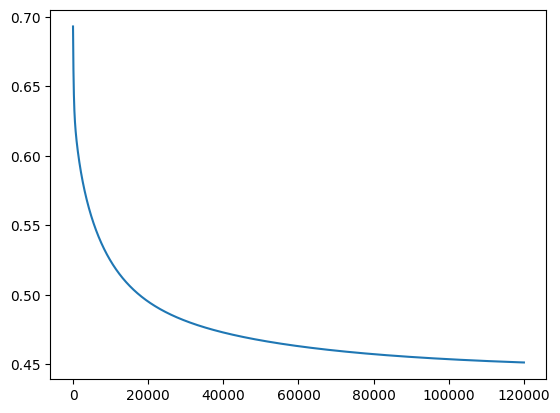

In [98]:
plt.plot(np.arange(iterations), my_logistic_regression.cost_list)
plt.show()

#### Utiliza tu algoritmo para predecir las categorías de los datos de prueba

- Calcula la accuracy, precision, recall y f1-score

In [91]:
y_pred = my_logistic_regression.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))


Accuracy: 0.7821229050279329
Precision: 0.7419354838709677
Recall: 0.6666666666666666
F1: 0.7022900763358778


#### Utiliza el algoritmo LogisticRegression de la librería scikit-learn.

- Compara los resultados con tu algoritmo
- Calcula la accuracy, precision, recall y f1-score

In [93]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train.flatten())

y_pred = lr.predict(X_test)

In [94]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))

Accuracy: 0.8044692737430168
Precision: 0.7428571428571429
Recall: 0.7536231884057971
F1: 0.7482014388489209
